# Forecasting Eth Prices Using Prophet

## Background

We will analyze patterns in hourly Bitcoin prices, believing that building a model which can forecast prices into the future will give an idea if investing in Bitcoin is worth or not.

## Instructions

Load the starter notebook into Google Colab and complete the following steps:

1. Execute the code cells under the "Notebook Set Up" section.

2. Read in the `eth_hourly` CSV file. Drop the `volume` column.

3. Label the columns `ds` and `y` so that the syntax is recognized by Prophet.

4. View dataframe shape, and the first and last five rows of the  DataFrame.

5. Sort the DataFrame by `ds` in ascending order, so as to arrange the data chronologically from past to present. With that done, visually inspect the price data using `hvplot`.

6. Call the `Prophet` function, and store it as an object.

7. `Fit` the time-series model.

8. Create a `future_trends` dataframe to hold predictions, using the `make_future_dataframe` function. (Make the prediction go out as far as 1,000 hours).

9. Make the predictions for the trend data using the `future_trends` DataFrame, and preview the first five rows of the DataFrame.

10. Plot the Prophet predictions for the `forecast_trends` data.

11. Use the `plot_components` function to visualize the forecast results.

12. Set the `datetime` index of the `forecast_trends` data, using the `ds` column.

13. From the `forecast_trends` DataFrame, use `hvPlot` to visualize the `yhat`, `yhat_lower`, and `yhat_upper` columns over the last 10 days (i.e., the last 240 rows).

14. Create a `forecast_decebmer_2022` Dataframe, which contains just forecasts for that month. The DataFrame should include the columns `yhat_upper`, `yhat_lower`, and `yhat`. Replace the column names to something less technical sounding: `Best Case`, `Worst Case`, and `Most Likely Case`, respectively.

15. Display the average forecasted price for December 2022




## Step 1: Notebook Set Up

In [55]:
# Install the required libraries
!pip install pystan
!pip install prophet
!pip install hvplot
!pip install holoviews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
import datetime as dt
import holoviews as hv
from prophet import Prophet

%matplotlib inline

## Step 2: Read in the `bitcoin_hourly` CSV file. Drop the `volume` column

In [57]:
# Upload the .csv file (optained from https://www.cryptodatadownload.com/data/gemini/)
from google.colab import files
uploaded = files.upload()

Saving Gemini_ETHUSD_1h-2023-2-17.csv to Gemini_ETHUSD_1h-2023-2-17.csv


Note: Make sure the data file only has date, close, and Volume columns. Delete all else. 

In [58]:
# Read csv file as DataFrame, with the first column as row index
df = pd.read_csv("Gemini_ETHUSD_1h-test1.csv",
                 index_col="date",
                 infer_datetime_format=True,
                 parse_dates=True
                )
# Drop columns that won't be used
df = df.drop("Volume", axis=1)

# Preview the dataset
df.head()

close
date                        
2023-02-17 23:00:00  1693.76
2023-02-17 22:00:00  1700.12
2023-02-17 21:00:00  1693.44
2023-02-17 20:00:00  1709.47
2023-02-17 19:00:00  1705.03

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
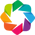

:Curve   [date]   (close)

In [59]:
# Set `bokeh` to render hvPlot charts
hv.extension("bokeh")

# Use hvPlot to visually inspect the price data
df["close"].hvplot()

## Step 3: Label the columns `ds` and `y` so that the syntax is recognized by Prophet

In [60]:
# Reset the index so that we recode the columns for Prophet
df = df.reset_index()

In [61]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df.columns = ['ds', 'y']

## Step 4:  View dataframe shape, and the first and last five rows of the  DataFrame

In [62]:
# View dataframe shape, and the first and last five rows of the mercado_prophet_df DataFrame
display(df.head())
#display(df.tails())
display(df.shape)

ds        y
0 2023-02-17 23:00:00  1693.76
1 2023-02-17 22:00:00  1700.12
2 2023-02-17 21:00:00  1693.44
3 2023-02-17 20:00:00  1709.47
4 2023-02-17 19:00:00  1705.03

(59408, 2)

## Step 5:  Sort the DataFrame by `ds` in ascending order, so as to arrange the data chronologically from past to present. With that done, visually inspect the price data using `hvplot`

In [63]:
# Sort the DataFrame by `ds` in ascending order
df = df.set_index('ds')
df.sort_index(ascending=True, inplace = True)

# Display sample data from head and tail
df.tail()

y
ds                          
2023-02-17 19:00:00  1705.03
2023-02-17 20:00:00  1709.47
2023-02-17 21:00:00  1693.44
2023-02-17 22:00:00  1700.12
2023-02-17 23:00:00  1693.76

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
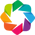

:Curve   [ds]   (y)

In [64]:
# Set `bokeh` to render hvPlot charts
hv.extension("bokeh")

# Diplay the data using hvPlot
df.hvplot()

## Step 6: Call the `Prophet` function, and store it as an object

In [65]:
# Call the Prophet function, store as an object
df = df.reset_index()
m = Prophet()
m

## Step 7: Fit the Prophet model.

In [66]:
# Fit the Prophet model.
m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_6u_exim/_yoz5qyb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_6u_exim/rjvd606z.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77480', 'data', 'file=/tmp/tmp_6u_exim/_yoz5qyb.json', 'init=/tmp/tmp_6u_exim/rjvd606z.json', 'output', 'file=/tmp/tmp_6u_exim/prophet_modelrq1v5wfh/prophet_model-20230218234132.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:41:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:43:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Step 8: Create a `future_trends` dataframe to hold predictions, using the `make_future_dataframe` function. (Make the prediction go out as far as 1,000 hours)

In [67]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 1000 hours (approx 40 days)
future_trends = m.make_future_dataframe(periods=1000, freq='H')

# View the last five rows of the predictions
display(future_trends.tail())

ds
60403 2023-03-31 11:00:00
60404 2023-03-31 12:00:00
60405 2023-03-31 13:00:00
60406 2023-03-31 14:00:00
60407 2023-03-31 15:00:00

## Step 9: Make the predictions for the trend data using the `future_trends` DataFrame, and preview the first five rows of the DataFrame

In [68]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends = m.predict(future_trends)

# Display the first five rows of the forecast DataFrame
display(forecast_trends.head())

ds       trend  yhat_lower  yhat_upper  trend_lower  \
0 2016-05-09 13:00:00  331.561192   -3.303995  539.818993   331.561192   
1 2016-05-09 14:00:00  331.628821  -31.644358  537.100152   331.628821   
2 2016-05-09 15:00:00  331.696451   -9.840622  550.667998   331.696451   
3 2016-05-09 16:00:00  331.764081  -35.411557  524.164059   331.764081   
4 2016-05-09 17:00:00  331.831711  -19.854259  541.286827   331.831711   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   331.561192      -70.848368            -70.848368            -70.848368   
1   331.628821      -71.111907            -71.111907            -71.111907   
2   331.696451      -71.477323            -71.477323            -71.477323   
3   331.764081      -71.898793            -71.898793            -71.898793   
4   331.831711      -72.348322            -72.348322            -72.348322   

      daily  ...    weekly  weekly_lower  weekly_upper     yearly  \
0 -0.009217  ... -1.131223     -1.131223     -1.131223 -69.707928   
1  0.124443  ... -1.064770     -1.064770     -1.064770 -70.171580   
2  0.159489  ... -0.999495     -0.999495     -0.999495 -70.637317   
3  0.142147  ... -0.935807     -0.935807     -0.935807 -71.105133   
4  0.100754  ... -0.874057     -0.874057     -0.874057 -71.575019   

   yearly_lower  yearly_upper  multiplicative_terms  \
0    -69.707928    -69.707928                   0.0   
1    -70.171580    -70.171580                   0.0   
2    -70.637317    -70.637317                   0.0   
3    -71.105133    -71.105133                   0.0   
4    -71.575019    -71.575019                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper        yhat  
0                         0.0                         0.0  260.712824  
1                         0.0                         0.0  260.516915  
2                         0.0                         0.0  260.219128  
3                         0.0                         0.0  259.865288  
4                         0.0                         0.0  259.483389  

[5 rows x 22 columns]

## Step 10: Plot the Prophet predictions for the `forecast_trends` data

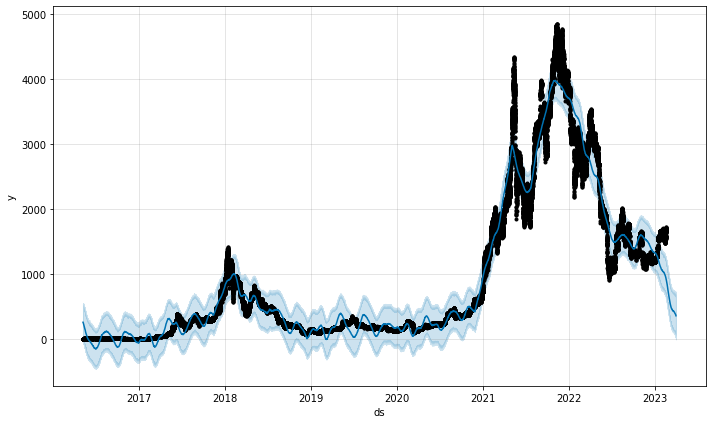

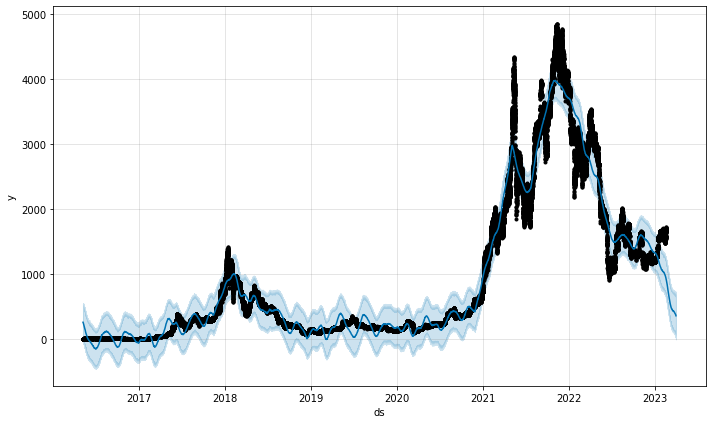

In [69]:
# Plot the Prophet predictions for the Mercado trends data
m.plot(forecast_trends)

## Step 11: Use the `plot_components` function to visualize the forecast results

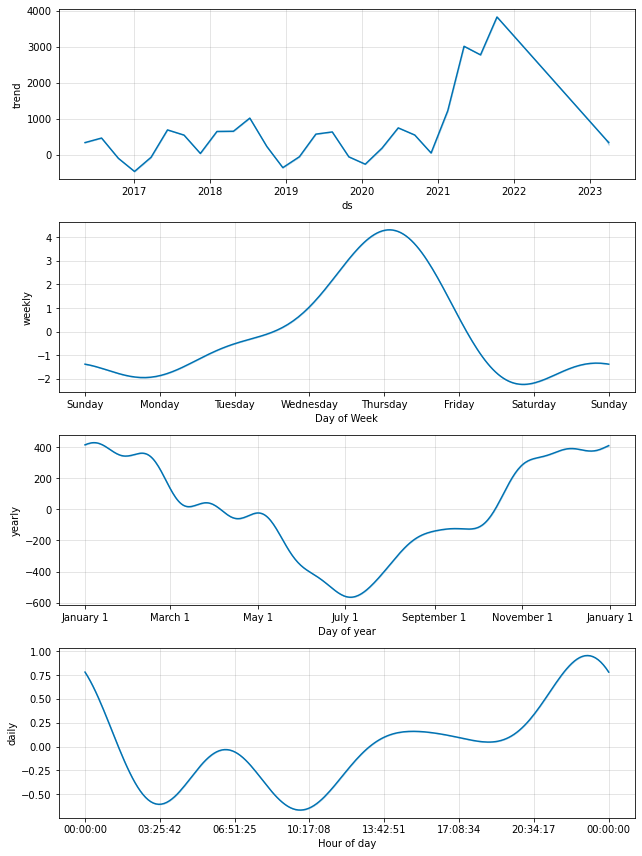

In [70]:
# Use the plot_components function to visualize the forecast results 
figures = m.plot_components(forecast_trends)

## Step 12: Set the `datetime` index of the `forecast_trends` data, using the `ds` column

In [71]:
# At this point, it's useful to set the `datetime` index of the forecast data.
forecast_trends = forecast_trends.set_index(['ds'])
forecast_trends.head()


trend  yhat_lower  yhat_upper  trend_lower  \
ds                                                                     
2016-05-09 13:00:00  331.561192   -3.303995  539.818993   331.561192   
2016-05-09 14:00:00  331.628821  -31.644358  537.100152   331.628821   
2016-05-09 15:00:00  331.696451   -9.840622  550.667998   331.696451   
2016-05-09 16:00:00  331.764081  -35.411557  524.164059   331.764081   
2016-05-09 17:00:00  331.831711  -19.854259  541.286827   331.831711   

                     trend_upper  additive_terms  additive_terms_lower  \
ds                                                                       
2016-05-09 13:00:00   331.561192      -70.848368            -70.848368   
2016-05-09 14:00:00   331.628821      -71.111907            -71.111907   
2016-05-09 15:00:00   331.696451      -71.477323            -71.477323   
2016-05-09 16:00:00   331.764081      -71.898793            -71.898793   
2016-05-09 17:00:00   331.831711      -72.348322            -72.348322   

                     additive_terms_upper     daily  daily_lower  ...  \
ds                                                                ...   
2016-05-09 13:00:00            -70.848368 -0.009217    -0.009217  ...   
2016-05-09 14:00:00            -71.111907  0.124443     0.124443  ...   
2016-05-09 15:00:00            -71.477323  0.159489     0.159489  ...   
2016-05-09 16:00:00            -71.898793  0.142147     0.142147  ...   
2016-05-09 17:00:00            -72.348322  0.100754     0.100754  ...   

                       weekly  weekly_lower  weekly_upper     yearly  \
ds                                                                     
2016-05-09 13:00:00 -1.131223     -1.131223     -1.131223 -69.707928   
2016-05-09 14:00:00 -1.064770     -1.064770     -1.064770 -70.171580   
2016-05-09 15:00:00 -0.999495     -0.999495     -0.999495 -70.637317   
2016-05-09 16:00:00 -0.935807     -0.935807     -0.935807 -71.105133   
2016-05-09 17:00:00 -0.874057     -0.874057     -0.874057 -71.575019   

                     yearly_lower  yearly_upper  multiplicative_terms  \
ds                                                                      
2016-05-09 13:00:00    -69.707928    -69.707928                   0.0   
2016-05-09 14:00:00    -70.171580    -70.171580                   0.0   
2016-05-09 15:00:00    -70.637317    -70.637317                   0.0   
2016-05-09 16:00:00    -71.105133    -71.105133                   0.0   
2016-05-09 17:00:00    -71.575019    -71.575019                   0.0   

                     multiplicative_terms_lower  multiplicative_terms_upper  \
ds                                                                            
2016-05-09 13:00:00                         0.0                         0.0   
2016-05-09 14:00:00                         0.0                         0.0   
2016-05-09 15:00:00                         0.0                         0.0   
2016-05-09 16:00:00                         0.0                         0.0   
2016-05-09 17:00:00                         0.0                         0.0   

                           yhat  
ds                               
2016-05-09 13:00:00  260.712824  
2016-05-09 14:00:00  260.516915  
2016-05-09 15:00:00  260.219128  
2016-05-09 16:00:00  259.865288  
2016-05-09 17:00:00  259.483389  

[5 rows x 21 columns]

## Step 13: From the `forecast_trends` DataFrame, use `hvPlot` to visualize the `yhat`, `yhat_lower`, and `yhat_upper` columns over the last 10 days (i.e., the last 240 rows)

* `yhat` represents the most likely (average) forecast.

* `yhat_lower` and `yhat_upper` represents the worst and best case prediction.

    * These are based on what are known as 80% confidence intervals.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
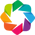

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

In [72]:
# From the `forecast_trends` DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 10 days (24*10 = 240) 
hv.extension('bokeh')

forecast_trends[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-240:,:].hvplot()

## Step 14: Create a `forecast_march_2021` Dataframe, which contains just forecasts for that month. The DataFrame should include the columns `yhat_upper`, `yhat_lower`, and `yhat`. Replace the column names to something less technical sounding: `Best Case`, `Worst Case`, and `Most Likely Case`, respectively

In [73]:
###ETH PREDICT###

# Create a `forecast_december_2022` Dataframe, which contains just forecasts for that month
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
forecast_december_2022 = forecast_trends[['yhat', 'yhat_upper','yhat_lower']].loc['2022-12-01':'2022-12-31']

# Replace the column names to something less technical sounding
forecast_december_2022.columns = ['most likely', 'best case', 'worst case']

# Review the last 12 rows of the DataFrame
twelve_hours=forecast_december_2022.tail(12)
twelve_hours

most likely    best case   worst case
ds                                                        
2022-12-31 12:00:00  1326.699967  1581.373568  1047.529282
2022-12-31 13:00:00  1326.891036  1594.449340  1048.154124
2022-12-31 14:00:00  1326.967330  1604.742555  1067.630010
2022-12-31 15:00:00  1326.939129  1600.699257  1042.455158
2022-12-31 16:00:00  1326.852238  1628.282802  1038.490849
2022-12-31 17:00:00  1326.734679  1594.581332  1053.770388
2022-12-31 18:00:00  1326.606569  1613.008093  1051.703324
2022-12-31 19:00:00  1326.520499  1610.045802  1030.658140
2022-12-31 20:00:00  1326.554119  1649.514113  1047.137901
2022-12-31 21:00:00  1326.731462  1593.589402  1034.682736
2022-12-31 22:00:00  1326.946456  1626.223663  1060.477159
2022-12-31 23:00:00  1326.989720  1597.454907  1035.762601

In [74]:
twelve_hours.to_csv('forecast_december_2022.csv')

In [75]:
# Display the average forecasted price for december 2022
forecast_december_2022.mean()

most likely    1401.804156
best case      1681.481423
worst case     1122.588384
dtype: float64